<a href="https://colab.research.google.com/github/yahafifi/Extracting-and-Refining-Questions/blob/main/Extracting_and_Refining_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
s = 'I love, NLP'
tokens = word_tokenize(s)

print(tokens)

['I', 'love', ',', 'NLP']


In [ ]:
from transformers import pipeline
sentiment_analyzer = pipeline('sentiment-analysis')
result = sentiment_analyzer('I hate learning NLP')
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9994757771492004}]


In [ ]:
import pandas as pd

In [ ]:
# /content/sample_data/ExMuslim.json

df = pd.read_json('/content/sample_data/ExMuslim.json')

In [ ]:
df.head()

,id,title,author,score,url,num_comments,text,date,comments
0,1f2appu,Is there anyone on this sub who converted to c...,Unique_Safety_9139,1,https://www.reddit.com/r/exmuslim/comments/1f2...,2,I am considering converting to the religion bu...,2024-08-27 06:56:14,"[{'id': 'lk4zt47', 'date': 1724741775.0, 'auth..."
1,1f2a0pa,Questions About Man Being Made on God's Image.,Electrical-Cress3355,1,https://www.reddit.com/r/exmuslim/comments/1f2...,2,"Koran, and possibly Bible, says that man was m...",2024-08-27 06:07:32,"[{'id': 'lk4vefa', 'date': 1724738852.0, 'auth..."
2,1f29egv,Refuting the Qur’an part 1,Emotional-Use9798,2,https://www.reddit.com/r/exmuslim/comments/1f2...,1,Hey guys! I’ve decided to do a short refutal o...,2024-08-27 05:26:11,"[{'id': 'lk4re7a', 'date': 1724736371.0, 'auth..."
3,1f291a3,Can Muslims stop being condescending?,Fun-Weird8872,5,https://www.reddit.com/r/exmuslim/comments/1f2...,4,I know I'm more privileged than lots of Muslim...,2024-08-27 05:02:06,"[{'id': 'lk4owv5', 'date': 1724734927.0, 'auth..."
4,1f28t1b,"Looking for advice, preferably from ex-Muslim ...",SwagLord5002,2,https://www.reddit.com/r/exmuslim/comments/1f2...,1,"Hello, all! \n\nI am making this post because ...",2024-08-27 04:48:12,"[{'id': 'lk4nejk', 'date': 1724734092.0, 'auth..."


In [ ]:
threshold = 20
hot_discussions = df[df['num_comments'] >= threshold]

In [ ]:
hot_discussions

,id,title,author,score,url,num_comments,text,date,comments
24,1f1xf11,What Was Your First Doubt About Islam That Mad...,Glittering_War_8282,17,https://www.reddit.com/r/exmuslim/comments/1f1...,42,"For those who once believed strongly in Islam,...",2024-08-26 19:47:21,"[{'id': 'lk2anop', 'date': 1724701642.0, 'auth..."
29,1f1vca8,Posted a video online without my hijab,SuperbbStuff,63,https://www.reddit.com/r/exmuslim/comments/1f1...,22,Lmao! I know this may be something that a lot ...,2024-08-26 18:23:54,"[{'id': 'lk1v8y5', 'date': 1724696634.0, 'auth..."
33,1f1unlp,Why do you think many Muslim Arabs claim they ...,LifeExaminedYT,46,https://www.reddit.com/r/exmuslim/comments/1f1...,58,"While it's perfectly fine to criticize Israel,...",2024-08-26 17:56:57,"[{'id': 'lk1q7rr', 'date': 1724695017.0, 'auth..."
40,1f1s5kf,I want to know everyone’s experience and reaso...,javierha1,27,https://www.reddit.com/r/exmuslim/comments/1f1...,49,Alot of muslims say that the reason we lift is...,2024-08-26 16:15:16,"[{'id': 'lk16ywh', 'date': 1724688916.0, 'auth..."
47,1f1pk13,Syrian suspect in German stabbing rampage conf...,almuamara,118,https://www.reuters.com/world/europe/german-st...,22,,2024-08-26 14:27:37,"[{'id': 'lk0n8g5', 'date': 1724682457.0, 'auth..."
...,...,...,...,...,...,...,...,...,...
926,1epbjkx,my moms texts to me because i’m gay and an ex ...,tariqdoleh,618,https://www.reddit.com/gallery/1epbjkx,427,,2024-08-11 03:54:14,"[{'id': 'lhjgh01', 'date': 1723348455.0, 'auth..."
929,1epa4wn,Christian and Muslim relationship… please help!,Formal-Tip-9342,14,https://www.reddit.com/r/exmuslim/comments/1ep...,24,I (24F) have been dating my boyfriend (25M) fo...,2024-08-11 02:38:19,"[{'id': 'lhj6k3b', 'date': 1723343900.0, 'auth..."
930,1ep9fk2,Defeating Islam,Lopsided-Ad7904,75,https://www.reddit.com/r/exmuslim/comments/1ep...,98,We may not be able to end it completely in the...,2024-08-11 02:00:24,"[{'id': 'lhj19oo', 'date': 1723341624.0, 'auth..."
934,1ep84qi,I’m so scared that my parents are going to kil...,Standard_Ad_4817,95,https://www.reddit.com/r/exmuslim/comments/1ep...,28,I had this Muslim friend back when I was Musli...,2024-08-11 00:52:19,"[{'id': 'lhirjge', 'date': 1723337540.0, 'auth..."


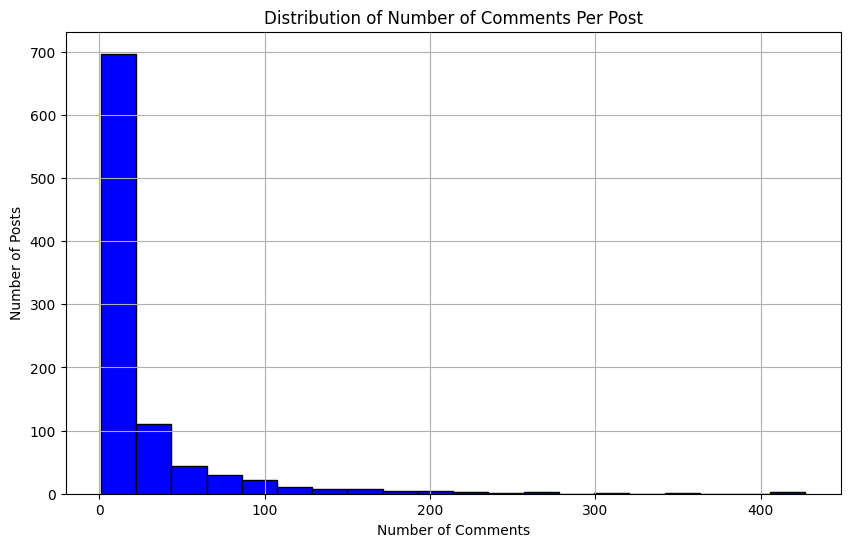

In [ ]:
import matplotlib.pyplot as plt

# Sample visualization of comment distribution across posts
# Plot the number of comments per post to visualize engagement levels


df['num_comments'] = df['comments'].apply(len)

# Plotting a histogram of the number of comments per post
plt.figure(figsize=(10, 6))
plt.hist(df['num_comments'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Number of Comments Per Post')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


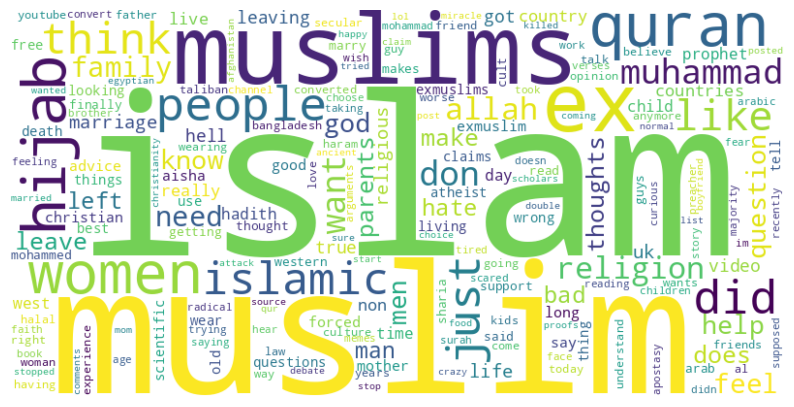

[('islam', 155),
 ('muslim', 121),
 ('muslims', 115),
 ('ex', 76),
 ('quran', 38),
 ('hijab', 38),
 ('women', 36),
 ('people', 34),
 ('did', 33),
 ('just', 32)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Create a document-term matrix for the titles or main text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
dtm = vectorizer.fit_transform(df['title'])  # Using titles for topic extraction
terms = vectorizer.get_feature_names_out()

# Sum up the counts of each term across all posts
sum_words = dtm.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Creating a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Show the top 10 most common terms as a list
top_terms = word_freq[:10]
top_terms


In [ ]:
import re
import html
import pandas as pd
from nltk.corpus import stopwords
from transformers import pipeline
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Load the dataset
df = pd.read_json('/content/sample_data/ExMuslim.json')
threshold = 20
df = df[df['num_comments'] >= threshold]

In [ ]:
# Define preprocessing functions

# Remove URLs
def remove_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.sub(url_pattern, '', text)

# Decode HTML entities
def decode_html_entities(text):
    return html.unescape(text)

# Clean special characters, keeping only alphabets, numbers, and question marks
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s\?]', '', text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Expand slang or abbreviations
slang_dict = {"idk": "i do not know", "wanna": "want to", "gonna": "going to", "btw": "by the way"}
def expand_slang(text):
    words = text.split()
    return ' '.join([slang_dict.get(word, word) for word in words])

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

# Combine all preprocessing steps
def preprocess_text(text):
    text = remove_urls(text)
    text = decode_html_entities(text)
    text = clean_text(text)
    text = text.lower()
    text = expand_slang(text)
    text = remove_stop_words(text)
    text = remove_extra_whitespace(text)
    return text

# Apply preprocessing to the title and text columns
df['title_clean'] = df['title'].apply(preprocess_text)
df['text_clean'] = df['text'].apply(preprocess_text)


In [ ]:
def is_valid_question(text):
    # Define common question words
    question_words = ['what', 'why', 'how', 'when', 'where', 'is', 'does', 'do', 'can', 'should', 'will']
    # Check if the text contains at least one question word
    return any(text.lower().startswith(word) for word in question_words)

# Function to extract explicit questions from text
def extract_questions(text):
    return re.findall(r'(?:(?:^|[.!?])\s*)(.*?\?)', text)


In [ ]:
# Check if titles are questions
df['is_question'] = df['title_clean'].apply(is_valid_question)
# Extract questions from the text column
df['extracted_questions'] = df['text_clean'].apply(extract_questions)

In [ ]:
# Combine questions from titles and text
def combine_questions(row):
    questions = []
    if row['is_question']:
        questions.append(row['title_clean'])
    questions.extend(row['extracted_questions'])
    return questions

In [ ]:
df['all_questions'] = df.apply(combine_questions, axis=1)

In [ ]:
df['all_questions']

,all_questions
0,[]
1,[koran possibly bible says man made god image ...
2,[hey guys ive decided short refutal quran isla...
3,[]
4,[hello making post questions particularly arou...
...,...
939,[]
940,[many people yearn relationship another fellow...
941,[im watching riots unfold england im realizing...
942,[]


In [ ]:
# Flatten the list of questions
questions_df = df.explode('all_questions')[['id', 'all_questions', 'url']].dropna()
questions_df.rename(columns={'all_questions': 'question'}, inplace=True)

In [ ]:
questions_df

,id,question,url
1,1f2a0pa,koran possibly bible says man made god image f...,https://www.reddit.com/r/exmuslim/comments/1f2...
1,1f2a0pa,god already dead?,https://www.reddit.com/r/exmuslim/comments/1f2...
1,1f2a0pa,god forget?,https://www.reddit.com/r/exmuslim/comments/1f2...
1,1f2a0pa,e god eats?,https://www.reddit.com/r/exmuslim/comments/1f2...
1,1f2a0pa,list long views assertion man made gods image?,https://www.reddit.com/r/exmuslim/comments/1f2...
...,...,...,...
940,1ep5yqg,many people yearn relationship another fellow ...,https://www.reddit.com/r/exmuslim/comments/1ep...
941,1ep5lci,im watching riots unfold england im realizing ...,https://www.reddit.com/r/exmuslim/comments/1ep...
941,1ep5lci,mean religious differences two nations well kn...,https://www.reddit.com/r/exmuslim/comments/1ep...
941,1ep5lci,geography country plays factor perceived idea ...,https://www.reddit.com/r/exmuslim/comments/1ep...


In [ ]:
summarizer = pipeline('summarization', model='t5-small')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
def refine_question(question):
    # Use the summarizer to refine the question
    summary = summarizer(question, max_length=70, min_length=5, do_sample=False)
    refined = summary[0]['summary_text']
    return refined

In [ ]:
# Apply the refinement process to the extracted questions
questions_df['refined_question'] = questions_df['question'].apply(refine_question)

Your max_length is set to 50, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 50, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 50, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 50, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_lengt

In [ ]:
# Display the original and refined questions
print(questions_df[['question', 'refined_question']].head())

                                            question  \
1  koran possibly bible says man made god image f...   
1                                  god already dead?   
1                                        god forget?   
1                                        e god eats?   
1     list long views assertion man made gods image?   

                                    refined_question  
1  koran bible says man made god image follows ob...  
1                                  god already dead?  
1                            god forget? god forgot?  
1                                        e god eats?  
1     list long views assertion man made gods image?  


In [ ]:
# Step 4: Save the final refined questions to CSV
questions_df.to_csv('refined_questions.csv', index=False)